   Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0   40       1   66120.267939                  8                0   
1   20       1   23579.773583                  4                2   
2   27       1  127821.306432                 11                2   
3   24       1  137798.623120                 19                3   
4   31       1   99300.964220                 19                1   

   TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0           30.568601               0                 5               1  
1           38.240097               0                 5               0  
2           31.633212               1                 0               1  
3           46.167059               0                 4               1  
4           19.823592               0                 0               1  
               Age   AnnualIncome  NumberOfPurchases  TimeSpentOnWebsite  \
count  1500.000000    1500.000000        1500.000000         1500

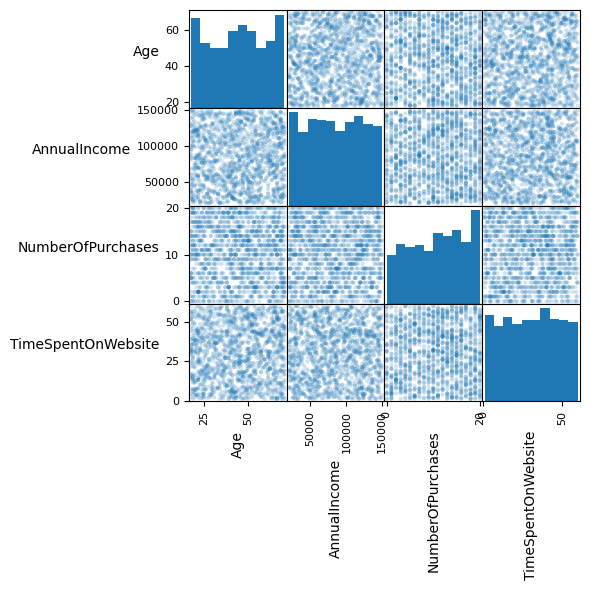

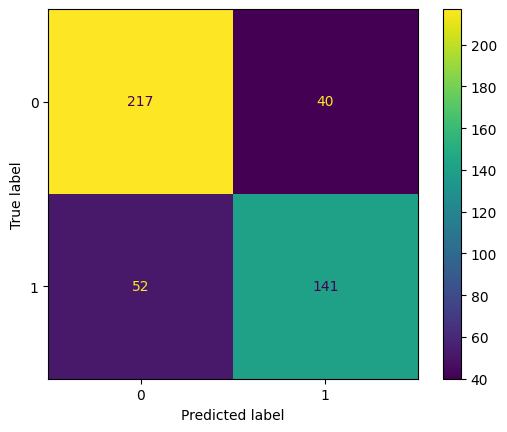

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
file_path = "/workspaces/datamining/customer_purchase_data.csv"
rawDF = pd.read_csv(file_path)

# Display first few rows
print(rawDF.head())

# Drop unnecessary columns (if any)
cleanDF = rawDF.drop(["customer_id"], axis=1, errors='ignore')

# Convert categorical variables if necessary
cleanDF["Gender"] = cleanDF["Gender"].astype("category")
cleanDF["ProductCategory"] = cleanDF["ProductCategory"].astype("category")
cleanDF["LoyaltyProgram"] = cleanDF["LoyaltyProgram"].astype("category")
cleanDF["PurchaseStatus"] = cleanDF["PurchaseStatus"].astype("category")

# Basic statistics
print(cleanDF.describe())

# Scatter matrix to visualize relationships
selDF = cleanDF[["Age", "AnnualIncome", "NumberOfPurchases", "TimeSpentOnWebsite"]]
fig = scatter_matrix(selDF, alpha=0.2, figsize=(6, 6), diagonal="hist")
for ax in fig.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right")
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

# Normalize numeric data
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

numeric_cols = ["Age", "AnnualIncome", "NumberOfPurchases", "TimeSpentOnWebsite", "DiscountsAvailed"]
cleanDF[numeric_cols] = cleanDF[numeric_cols].apply(normalize, axis=0)

# Define X (features) and y (target)
excluded = ["PurchaseStatus"]  # Exclude target variable
X = cleanDF.drop(columns=excluded)
y = cleanDF["PurchaseStatus"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [14]:
new_customer = pd.DataFrame([{
    "Age": 44,
    "Gender": 0,
    "AnnualIncome": 86086.8710991164,
    "NumberOfPurchases": 16,
    "ProductCategory": 4,
    "TimeSpentOnWebsite": 28.9704995823636,
    "LoyaltyProgram": 0,
    "DiscountsAvailed": 3
}])

In [10]:
# Normalize numeric features using the same method as training
for col in ["Age", "AnnualIncome", "NumberOfPurchases", "TimeSpentOnWebsite", "DiscountsAvailed"]:
    new_customer[col] = (new_customer[col] - cleanDF[col].min()) / (cleanDF[col].max() - cleanDF[col].min())


In [11]:
prediction = knn.predict(new_customer)
print(f"Predicted Purchase Status: {prediction[0]}")  # 0 = No, 1 = Yes


Predicted Purchase Status: 1


In [23]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 79.56%


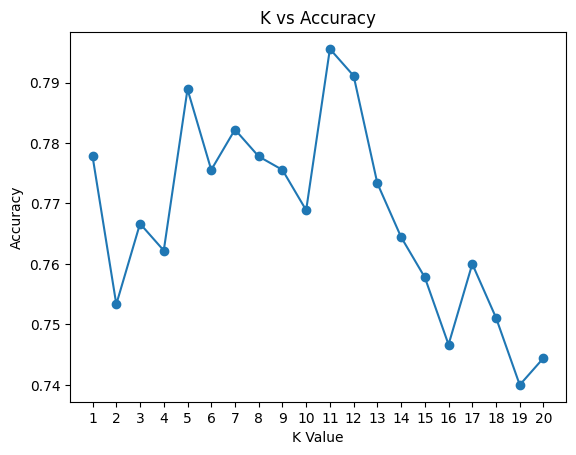

Best K found: 11


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.xticks(k_values)
plt.show()

# Best K based on the test set
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best K found: {best_k}")
